In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import sklearn
import os
import time
from tensorflow import keras
#答应版本
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
#导入数据
(x_train_all,y_train_all),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
#图片归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaler = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [6]:
#tf.keras.Sequential()
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="relu"))
model.add(keras.layers.Dense(10,
                            activation="softmax"))
#relu : y  = max(0,x)
#softmax: 将向量变成概率分布 x = [x1,x2,x3] y = [e^x1/sum,e^x2/sum,e^x3/sum] sum = e^x1+e^x2+e^x

#loss 如果lable 是一个one-hot 向量 ：categorical_croossentropy，不是向量：sparse_categorical_crossentropy
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [8]:
logdir = r'C:\Users\Xiaoi\Desktop\tensorflow2.0\dnn_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

_callbacks = [
    keras.callbacks.TensorBoard(logdir),#tensotBoard 路径
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True), #保存最好的模型
    keras.callbacks.EarlyStopping(patience=5,
                                 min_delta=1e-3) # 5轮之内，最低为1e-3 就停止
]
history = model.fit(x_train_scaled,
                    y_train,
                   epochs=10,
                   validation_data=(x_valid_scaler,y_valid),
                   callbacks=_callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 107us/sample - loss: 2.3019 - accuracy: 0.1539 - val_loss: 2.3014 - val_accuracy: 0.1448
Epoch 2/10
55000/55000 [==============================] - 5s 98us/sample - loss: 2.3005 - accuracy: 0.1803 - val_loss: 2.2995 - val_accuracy: 0.2268
Epoch 3/10
55000/55000 [==============================] - 5s 97us/sample - loss: 2.2979 - accuracy: 0.2108 - val_loss: 2.2958 - val_accuracy: 0.1950
Epoch 4/10
55000/55000 [==============================] - 5s 98us/sample - loss: 2.2922 - accuracy: 0.2075 - val_loss: 2.2877 - val_accuracy: 0.2034
Epoch 5/10
55000/55000 [==============================] - 5s 98us/sample - loss: 2.2805 - accuracy: 0.2147 - val_loss: 2.2709 - val_accuracy: 0.2196
Epoch 6/10
55000/55000 [==============================] - 5s 98us/sample - loss: 2.2544 - accuracy: 0.2250 - val_loss: 2.2311 - val_accuracy: 0.2244
Epoch 7/10
55000/55000 [==============================] 

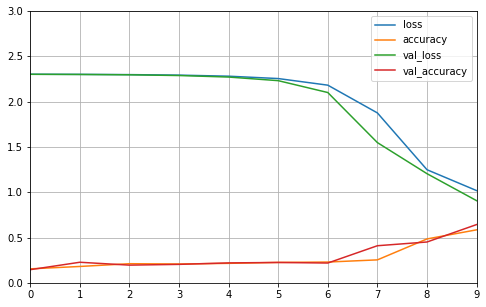

In [10]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
plot_learning_curver(history)
"""
1.参数众多，训练不充分
2.梯度消失-》链式法则-》复合函数f(g(x))
"""
